To explore how the selection of data analysis tools can fundamentally shape what is highlighted in an investigation, Pimental, Horton, and Wilkerson conducted a comparative analysis using several popular tools from multiple tool genres. This file demonstrates how Python can be used to carry out these analyses. The associated commissioned paper, supplementary materials, RMarkdown file, and dataset can be found at https://nicholasjhorton.github.io/K12-Data-Tools. Thanks to Jay Kienzle for translating the example to Python.

In [1]:
import pandas as pd

df = pd.read_csv(r"https://nicholasjhorton.github.io/K12-Data-Tools/static/fishdata.csv")
df = df[df["Common Name"] == "American lobster"]
df["Region"].replace(["Northeast US Fall","Northeast US Spring"], "Northeast US",
                     inplace=True,
                     )
df.head()

Common Name             Species  Year                      Region  \
0  American lobster  Homarus americanus  1971  Gulf of St. Lawrence South   
6  American lobster  Homarus americanus  1972  Gulf of St. Lawrence South   
7  American lobster  Homarus americanus  1973  Gulf of St. Lawrence South   
8  American lobster  Homarus americanus  1974  Gulf of St. Lawrence South   
9  American lobster  Homarus americanus  1975  Gulf of St. Lawrence South   

    Latitude  Longitude  Depth  
0  45.896731 -62.476134    NaN  
6  46.895090 -64.468539    NaN  
7  45.896731 -62.476134    NaN  
8  45.896731 -62.476134    NaN  
9  46.555377 -61.602654    NaN

This vignette 

In [2]:
print(df["Region"].value_counts())
print(f"Total rows: {df.shape[0]}")

Northeast US                  89
Maritimes Summer              50
Gulf of St. Lawrence South    48
Name: Region, dtype: int64
Total rows: 187


In [3]:
df["Region"].value_counts(normalize=True)*100

Northeast US                  47.593583
Maritimes Summer              26.737968
Gulf of St. Lawrence South    25.668449
Name: Region, dtype: float64

In [4]:
df["Year"].value_counts()

1996    4
1993    4
2019    4
1997    4
1998    4
1999    4
2000    4
2001    4
2002    4
2004    4
2005    4
2006    4
2007    4
2008    4
2009    4
2010    4
2011    4
2012    4
2013    4
2015    4
2016    4
1995    4
1994    4
1982    4
1983    4
1976    4
1977    4
1978    4
1979    4
1980    4
1981    4
1992    4
1984    4
1974    4
1985    4
1986    4
1987    4
1988    4
1989    4
1990    4
1991    4
2003    3
2018    3
2014    3
1975    3
2017    3
1971    2
1972    2
1973    2
1970    1
2020    1
Name: Year, dtype: int64

In [5]:
df["Latitude"].describe()

count    185.000000
mean      43.547218
std        1.971605
min       40.787100
25%       41.945837
50%       42.957488
75%       45.896731
max       47.227152
Name: Latitude, dtype: float64

In [6]:
df["Longitude"].describe()

count    185.000000
mean     -66.246863
std        2.631807
min      -70.236450
25%      -68.720644
50%      -66.130305
75%      -63.452232
max      -60.735165
Name: Longitude, dtype: float64

In [7]:
import pandas as pd
import plotly.express as px

fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", 
                        zoom=4.5,
                        color="Region"
                        )
fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [8]:
import pandas as pd
import plotly.express as px

fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", 
                        zoom=4.5,
                        color="Year"
                        )
fig.update_layout(mapbox_style="open-street-map")

fig.show()

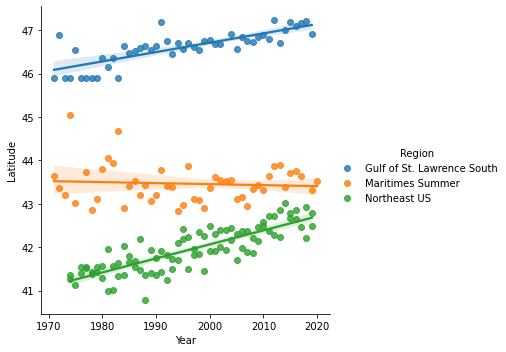

In [9]:
import seaborn as sns

sns.lmplot(x="Year", y="Latitude", data=df, hue="Region")